# Monte Carlo Simulation HW2 Question 1

In [107]:
# (a)
import numpy as np
from numpy.random import normal as norm
from numpy.random import gamma 
from scipy.stats import truncnorm, bernoulli

beta, z, lam = [1], [[1]*75] , [[1]*75]

def p_beta_zl(z, lam): #beta given z and lambda
    mu = sum ([lam[i] * z[i] for i in range(75)]) / \
    sum([lam[j] for j in range(75)])
    sigma = 1 / sum([lam[j] for j in range(75)])
    beta=norm(mu, sigma)
    return beta

def p_z_bl(beta, lam): 
    z_new = [0]*75
    for i in range(50):
        z_new[i] = truncnorm.rvs(0, np.infty, loc=beta, \
                                 scale=lam[i])
    for i in range(50,75):
        z_new[i] = truncnorm.rvs(-np.infty, 0, loc=beta, \
                                 scale=lam[i])
    return z_new

def p_lam_bz(beta, z): #lambda given beta and z
    scale = [0]*75
    lam_new = [0]*75
    for i in range(75):
        scale[i] = 2/(4+(z[i] + beta)**2) 
        lam_new[i] = gamma(2.5, scale[i])
    return lam_new

for i in range(5000):
    beta.append(p_beta_zl(z[i], lam[i]))
    z.append(p_z_bl(beta[i+1], lam[i]))
    lam.append(p_lam_bz(beta[i+1], z[i+1]))

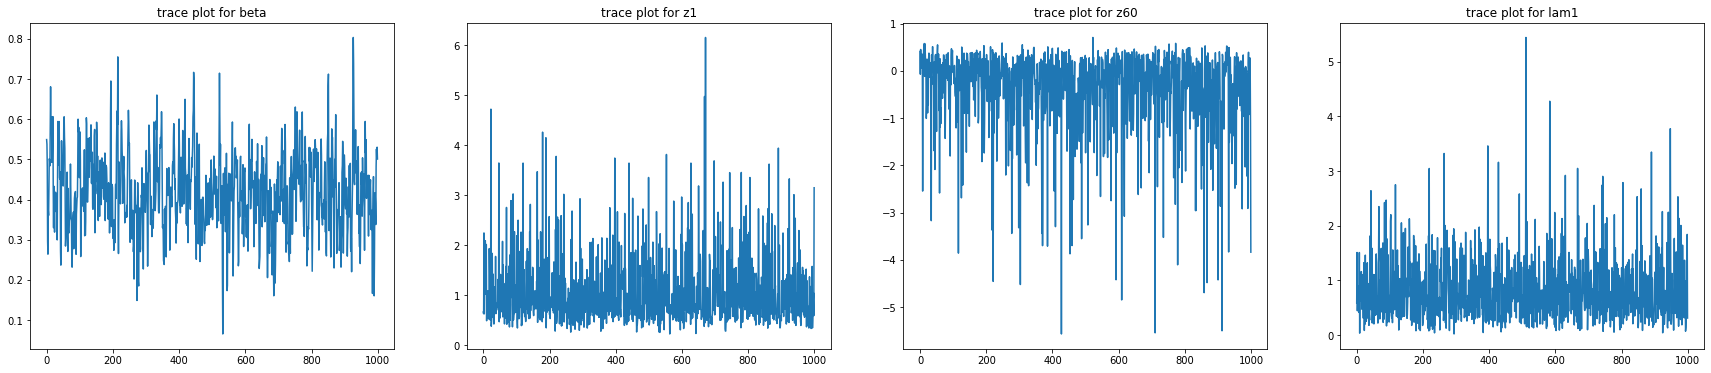

In [124]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 6))

plt.subplot(141)
plt.title("trace plot for beta")
plt.plot(beta[4000:5000])

plt.subplot(142)
plt.title("trace plot for z1")
plt.plot([z[i][1] for i in range(4000,5000)])

plt.subplot(143)
plt.title("trace plot for z60")
plt.plot([z[i][60] for i in range(4000,5000)])

plt.subplot(144)
plt.title("trace plot for lam1")
plt.plot([lam[i][1] for i in range(4000,5000)])


Above are trace plots for latest 1000 observations. Note that beta seem to have mean 0.4, z1 and lambda only have positive values, and z60 has negative values.

'\nplt.subplot(151)\nplt.title("trace plot for beta")\nplt.hist(beta[4000:5000])\n\nplt.subplot(152)\nplt.title("trace plot for z1")\nplt.hist([z[i][1] for i in range(4000,5000)])\n\nplt.subplot(153)\nplt.title("trace plot for z60")\nplt.hist([z[i][60] for i in range(4000,5000)])\n\nplt.subplot(154)\nplt.title("trace plot for lam1")\nplt.hist([lam[i][1] for i in range(4000,5000)])\n'

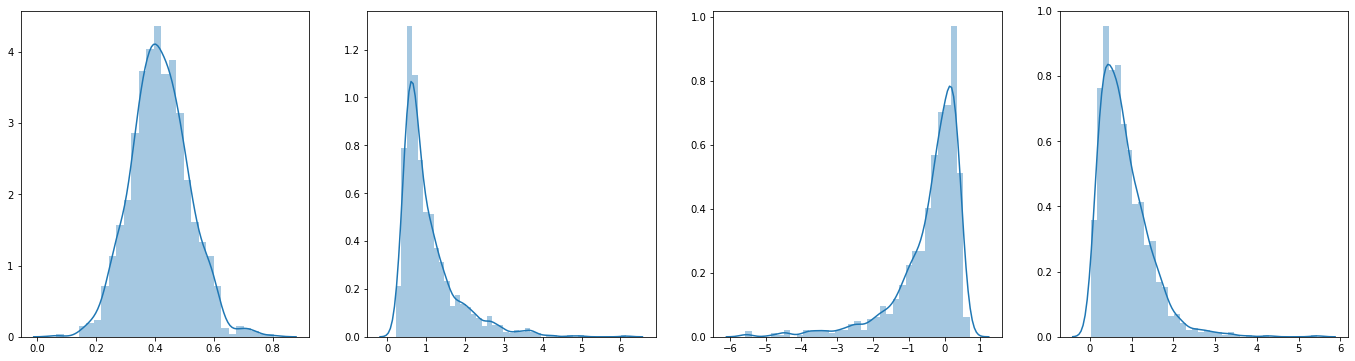

In [135]:
import seaborn as sns
plt.figure(figsize=(30, 6))
plt.subplot(151)
sns.distplot(beta[4000:5000])

plt.subplot(152)
sns.distplot([z[i][1] for i in range(4000,5000)])

plt.subplot(153)
sns.distplot([z[i][60] for i in range(4000,5000)])

plt.subplot(154)
sns.distplot([lam[i][1] for i in range(4000,5000)])

In [163]:
f_hat = np.mean([p_beta_zl(z[i], lam[i]) for i in range(4000,5000)])
f_hat

0.41626146052294843

For 1000 observations, the mean value of $f(\beta | z, \lambda)$ is about 0.416

#  Question 2

### (a)
Joint distribution = $p(\theta_i,\alpha,\beta,y) \propto Pois_p(\theta_i t_i) * \Gamma_p(\alpha,\beta) * \Gamma_p(\dfrac{1}{5},1)$, where $Pois_p$ and $\Gamma_p$ are simply their pdfs. <br> Conditional posteriors can be calculated by taking product of terms that involve a certain parameter. <br>

Full conditional posterior of $\theta_i = p(\theta_i | y,\alpha,\beta) \propto Pois_p(\theta_i t_i) * \Gamma_p(\alpha,\beta)$, since $\Gamma_p(\dfrac{1}{5},1)$ does not invlove $\theta_i$, and <br>

Full conditional posterior of $\beta = p(\beta | y,\alpha,\theta_i) \propto \Gamma_p(\alpha, \beta) * \Gamma_p(\dfrac{1}{5},1)$, since Poisson does not involve $\beta$. Hence: <br>

$p(\theta_i | y,\alpha,\beta) \propto Pois_p(\theta_i t_i) * \Gamma_p(\alpha,\beta) = \dfrac{(\theta_i t_i)^{Y_i} e^{-\theta_i t_i}}{Y_i!} \dfrac{\beta ^ \alpha}{\Gamma(\alpha)} \theta_i^{\alpha - 1} e^{-\beta \theta_i}$ <br>

$p(\beta | y,\alpha,\theta_i) \propto \Gamma_p(\alpha, \beta) * \Gamma_p(\dfrac{1}{5},1) = \dfrac{\beta ^ \alpha}{\Gamma(\alpha)} \theta_i^{\alpha - 1} e^{-\beta \theta_i} \dfrac{1}{\Gamma(1/5)} \beta^{-4/5} e^{- \beta}$


### (b)
Using the full conditional posterior for $\theta_i$ and $\beta$ found from the (a), we can do Gibbs Sampling to sample from the joint distribution. (Note since $\alpha = 1,$ we only need two posteriors to perform Gibbs). We will be able to sample what we want from these two distributions, and may even come up with marginal distributions. However, since it is very complicated to draw from product of distributions, we will simplify the problem.

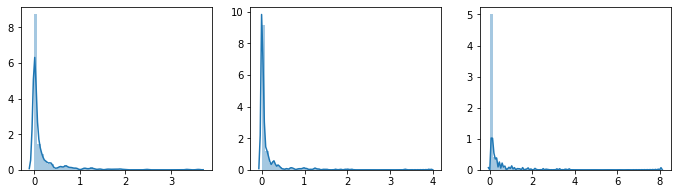

In [165]:
from numpy.random import gamma

beta = []
theta1 = []
theta2 = []

for i in range(500):
    beta.append(gamma(1/5,1))
    theta1.append(gamma(1,beta))
    theta2.append(gamma(1,beta))

plt.figure(figsize=(24, 3))
plt.subplot(161)
sns.distplot(beta)

plt.subplot(162)
sns.distplot(theta1[499])

plt.subplot(163)
sns.distplot(theta2[499])


# Question 3

### (a)
$ E[(x-\mu)^3] = E[x^3-3\mu X^2 + 3\mu^2 X - \mu^3] $ <br>
$= E[X^3] - 3\mu E[X^2] 3\mu^2 E[X] - E[\mu^3]$ <br>
$= \mathbf{E[X^3] - 3\mu E[X^2] + 2\mu^3} $ <br>
Further, since $E[(X-\mu)^2] = E[X^2] + E[X]^2,$ and $Var[X] = 1, E[X] = 2$ as given, we have $E[X^2] = 5.$ <br>

Plugging in the known values to original equation and solving for third moment we have: <br>
$E[X^3] = 3(2)(5)-2(8) = 14$, since $E[(x-\mu)^3] = 0$. <br>
Hence, $ E[X^3] = \displaystyle \int_{-\infty}^{\infty} x^3 p(x) dx = \mathbf{14}, $ where $p(x) \sim N(2,1)$

In [153]:
# (b)
from scipy.stats import norm as n


def Metro_Hast(num, mu, var, const = True):
    # Assumption: This func can be used only when helper is Normal
    # num: number of iterations
    # mu: mean of the helper normal distribution
    # const is set to False when mu is not a constant
    
    x = [0]
    count = 0
    for k in range(num):
        if const is False:
            mu = x[k]
        z = norm(mu,var) #helper is N(0,1)
        a = (n.pdf(z, loc=2, scale=1) * n.pdf(x[k], loc=mu, \
                                              scale=var)) / \
        (n.pdf(x[k], loc=2, scale=1) * n.pdf(z, loc=mu, \
                                             scale=var)) #f(z)g(x)/f(x)g(z)

        alpha = min(1,a)

        u = bernoulli.rvs(alpha)

        if u == 1:
            x.append(z)
            count += 1
        else:
            x.append(x[k])

    return x[num-1], count/num
    #First output: sample from original distribution.
    #Second output: acceptance rate
    
samples = []

for i in range(500): #obtain 500 samples
    samples.append(Metro_Hast(600, 0, 1))

print("mean of original distributions is: ", \
      np.mean( [samples[i][0] for i in range(500)] ))
print("Approximated value of integral is: ", \
      np.mean( np.array( [samples[i][0]**3 for i in range(500)]) ))
print("average acceptance rate is: ", \
      np.mean( [samples[i][1] for i in range(500)] ))


mean of original distributions is:  2.024345226961827
Approximated value of integral is:  13.807536703288076
average acceptance rate is:  0.17044000000000004


With N(0,1) as proposed distribution, aprroximated value of integral is 13.8 and acceptance rate is 0.17 <br>
<font color=blue> __NOTE WE ONLY PROCEEDED WITH 500 SAMPLES SINCE IT TAKES WAY TOO MUCH TIME TO OBTAIN 5000 SAMPLES. <br>
(IN JUPYTER NOTEBOOK, IT ALREADY TOOK 10 MINUTES TO JUST GET 500 SAMPLES)__

In [164]:
samples = []

for i in range(500): #obtain 500 samples
    samples.append(Metro_Hast(600, 2, 1))

print("mean of original distributions is: ", \
      np.mean( [samples[i][0] for i in range(500)] ))
print("Approximated value of integral is: ", \
      np.mean( np.array( [samples[i][0]**3 for i in range(500)]) ))
print("average acceptance rate is: ", \
      np.mean( [samples[i][1] for i in range(500)] ))

mean of original distributions is:  1.9397452861154807
Approximated value of integral is:  12.693265612756539
average acceptance rate is:  1.0


With N(2,1) as proposed distribution, aprroximated value of integral is 12.69 and acceptance rate is 1.0. Note this distribution is exactly the same as the original pdf of N(2,1), hence we accepted all samples. Note integral estimate is not as accurate.

In [155]:
samples = []

for i in range(500): #obtain 500 samples
    samples.append(Metro_Hast(600, 0, 1, False))

print("mean of original distributions is: ", \
      np.mean( [samples[i][0] for i in range(500)] ))
print("Approximated value of integral is: ", \
      np.mean( np.array( [samples[i][0]**3 for i in range(500)]) ))
print("average acceptance rate is: ", \
      np.mean( [samples[i][1] for i in range(500)] ))

mean of original distributions is:  2.061057107749316
Approximated value of integral is:  20.028445651685733
average acceptance rate is:  0.7758400000000001


With $N(x_k,1)$ as proposed distribution, aprroximated value of integral is 20 and acceptance rate is 0.77. Note that the integral estimate is very inaccurate and the acceptance rate is pretty high. Inaccuracy of integrals may be due to the varying mean $x_k,$ but only with small variance 1.

In [156]:
samples = []

for i in range(500): #obtain 500 samples
    samples.append(Metro_Hast(600, 0, 5, False))

print("mean of original distributions is: ", \
      np.mean( [samples[i][0] for i in range(500)] ))
print("Approximated value of integral is: ", \
      np.mean( np.array( [samples[i][0]**3 for i in range(500)]) ))
print("average acceptance rate is: ", \
      np.mean( [samples[i][1] for i in range(500)] ))

mean of original distributions is:  1.9899982015340998
Approximated value of integral is:  14.155928993264736
average acceptance rate is:  0.24996666666666664


With $N(x_k,5)$ as proposed distribution, aprroximated value of integral is 14.1 and acceptance rate is 0.25. Note that the integral estimate is very accurate and the acceptance rate is pretty low. Due to higher variance, we may expect to get samples that are far from the mean.

# Question 4

In [159]:
#(a)
from numpy.linalg import cholesky as Chol

def gauss_cop(rho):
    cov = np.array([[1,rho],[rho,1]])
    z = norm(0,1,2) # 2 samples
    A = Chol(cov)
    z_star = np.matmul(A, z)
    u = [0]*2
    x = [0]*2
    for i in range(2):
        u[i] = n.cdf(z_star[i]/np.sqrt(cov[i,i]))
        x[i] = n.ppf(u[i]) 
    return x

In [160]:
#(b)
from scipy.stats import chi2 as chisq
from scipy.stats import t

def t_cop(rho, v):
    cov = np.array([[1,rho],[rho,1]])
    z = norm(0,1,2) # 2 samples
    A = Chol(cov)
    z_star = np.matmul(A, z)
    
    s = chisq.rvs(v)
    u = [0]*2
    x = [0]*2
    
    for i in range(2):
        u[i] = t.cdf((z_star[i]/np.sqrt(cov[i,i])) / np.sqrt(s/v), v)
        x[i] = t.ppf(u[i], v) 
    return x

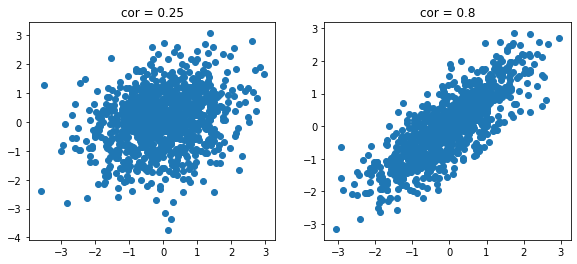

In [161]:
#(c)
samples = []
for i in range(1000):
    samples.append(gauss_cop(0.25))
samples = np.array(samples)

samples2 = []
for i in range(1000):
    samples2.append(gauss_cop(0.8))
samples2 = np.array(samples2)

plt.figure(figsize=(15, 4))

plt.subplot(131)
plt.title("cor = 0.25")
plt.scatter(samples[:,0], samples[:,1])

plt.subplot(132)
plt.title("cor = 0.8")
plt.scatter(samples2[:,0], samples2[:,1])

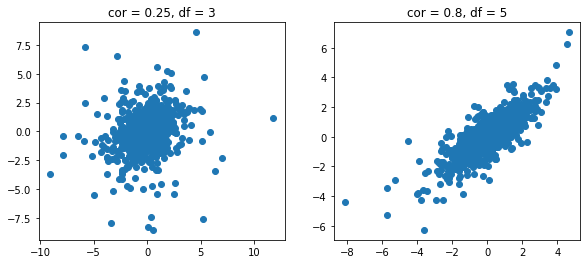

In [162]:
samples = []
for i in range(1000):
    samples.append(t_cop(0.25,3))
samples = np.array(samples)

samples2 = []
for i in range(1000):
    samples2.append(t_cop(0.8,5))
samples2 = np.array(samples2)

plt.figure(figsize=(15, 4))

plt.subplot(131)
plt.title("cor = 0.25, df = 3")
plt.scatter(samples[:,0], samples[:,1])

plt.subplot(132)
plt.title("cor = 0.8, df = 5")
plt.scatter(samples2[:,0], samples2[:,1])

Note that for t-copula, we are getting more extreme values (higher variance) than from gaussian copula. For Gaussian copula, most observations stay around the mean and there are not much points that can be noted as outliers. For both copula, note higher correlation implies more linear relationship.